In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow --quiet

In [3]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [4]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [5]:
# Read in the Silver dataset from a CSV file
df=pd.read_csv("/content/drive/MyDrive/PTDLKD/Data/Silver_Data.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

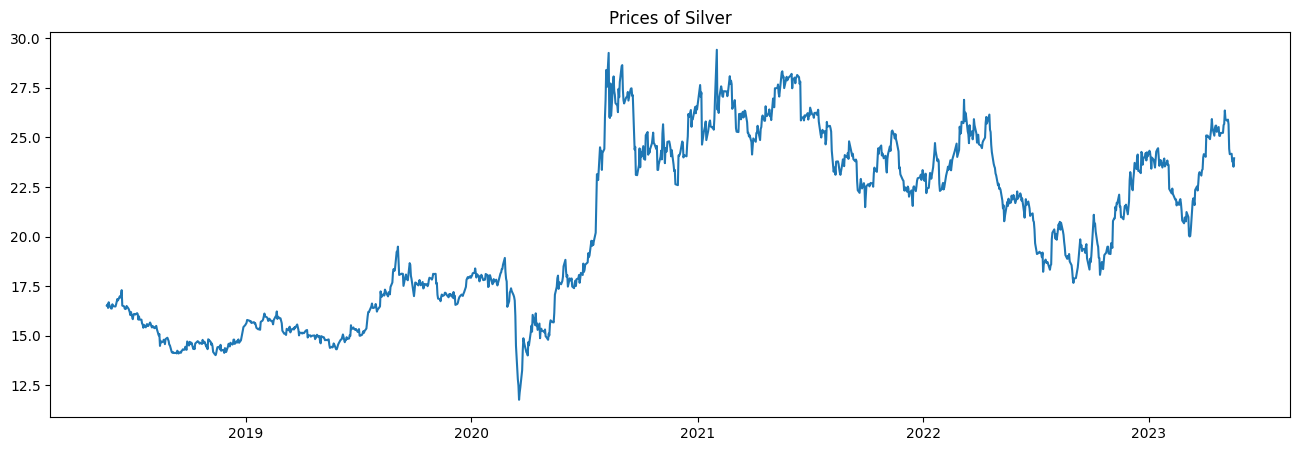

In [6]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Flip the column
df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Price'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Price'])
plt.title('Prices of Silver')
plt.show()

# Split dataset (7-2-1)

---



In [7]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [8]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [9]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [10]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.16753, saving model to save_model_7_2_1.hdf5
16/16 - 16s - loss: 0.1675 - 16s/epoch - 1s/step
Epoch 2/80

Epoch 2: loss improved from 0.16753 to 0.05807, saving model to save_model_7_2_1.hdf5
16/16 - 5s - loss: 0.0581 - 5s/epoch - 325ms/step
Epoch 3/80

Epoch 3: loss improved from 0.05807 to 0.04405, saving model to save_model_7_2_1.hdf5
16/16 - 7s - loss: 0.0441 - 7s/epoch - 433ms/step
Epoch 4/80

Epoch 4: loss improved from 0.04405 to 0.04168, saving model to save_model_7_2_1.hdf5
16/16 - 5s - loss: 0.0417 - 5s/epoch - 295ms/step
Epoch 5/80

Epoch 5: loss improved from 0.04168 to 0.04107, saving model to save_model_7_2_1.hdf5
16/16 - 3s - loss: 0.0411 - 3s/epoch - 159ms/step
Epoch 6/80

Epoch 6: loss improved from 0.04107 to 0.03964, saving model to save_model_7_2_1.hdf5
16/16 - 3s - loss: 0.0396 - 3s/epoch - 162ms/step
Epoch 7/80

Epoch 7: loss improved from 0.03964 to 0.03806, saving model to save_model_7_2_1.hdf5
16/16 - 4s - loss: 

In [11]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_7_2_1.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

25/25 [==============================] - 3s 37ms/step


In [12]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

8/8 [==============================] - 0s 41ms/step


In [13]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

4/4 [==============================] - 0s 43ms/step


In [14]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.7063357134761418, 0.690921455287317, 0.6603196191771504, 0.6919415164909893, 0.6856511390683439, 0.673977105292984, 0.6635498129887792, 0.6880879519437831, 0.7087725263515811, 0.7164796554459932, 0.7187464581208204, 0.6917148362235067, 0.6685367788733988, 0.6811175337186898, 0.6850277683327665, 0.6635498129887792, 0.673977105292984, 0.6842343873965769, 0.6893913634818088, 0.6665533265329252, 0.6778306698401902, 0.68366768672787, 0.6708035815482262, 0.67114360194945, 0.6025728210359288, 0.5930522498016545, 0.589652045789414, 0.603422872038989, 0.5877252635158109, 0.5838716989686047, 0.5712342740564432, 0.5724243454607275, 0.5553666553326532, 0.563187124560807, 0.5634704748951603, 0.5568400770712908, 0.5687407911141334, 0.5733877365975292, 0.5613170123540744, 0.5402924175450526, 0.5121840643771959, 0.5042502550153009, 0.5207412444746683, 0.5206279043409271, 0.5096905814348859, 0.5364388529978464, 0.522044656012694, 0.4693414938229624, 0.4665646605462993, 0.4676980618837129, 0

In [15]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.6855292320251465], [0.6839138269424438], [0.6799798011779785], [0.6759175658226013], [0.6722535490989685], [0.6692302227020264], [0.6668400764465332], [0.6649628281593323], [0.663456916809082], [0.6622019410133362], [0.6611133813858032], [0.6601396203041077], [0.6592528820037842], [0.6584389805793762], [0.6576902270317078], [0.6570010781288147], [0.6563656330108643], [0.6557775139808655], [0.6552295684814453], [0.654714822769165], [0.6542271375656128], [0.653760552406311], [0.6533106565475464], [0.6528735756874084], [0.6524465084075928], [0.6520272493362427], [0.6516141295433044], [0.6512058973312378], [0.6508015990257263], [0.6504010558128357]]


In [16]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [17]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[23.86884883]
 [23.84034339]
 [23.77092357]
 [23.69924137]
 [23.63458613]
 [23.58123651]
 [23.53905999]
 [23.50593407]
 [23.47936075]
 [23.45721545]
 [23.43800673]
 [23.42082374]
 [23.40517636]
 [23.39081425]
 [23.37760175]
 [23.36544102]
 [23.35422796]
 [23.34385001]
 [23.33418097]
 [23.32509776]
 [23.31649207]
 [23.30825871]
 [23.30031985]
 [23.29260712]
 [23.28507109]
 [23.27767284]
 [23.27038293]
 [23.26317926]
 [23.25604502]
 [23.24897703]]


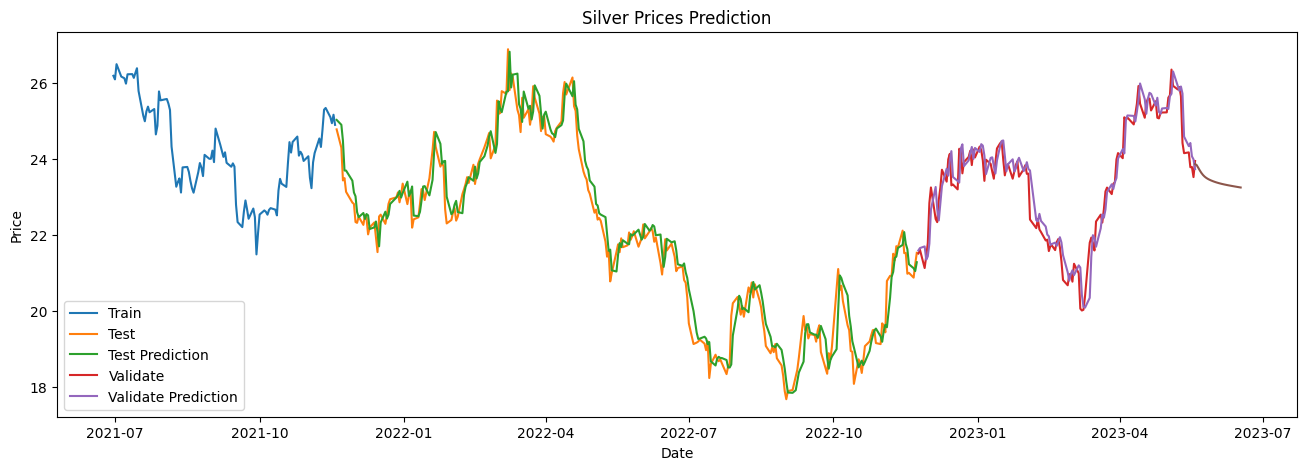

In [18]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [19]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.34761331498622905
MAPE:  1.6054504261846407
RMSE:  0.4528709844682707

** Validate **
MAE:  0.3240354552268981
MAPE:  1.4006801258441908
RMSE:  0.4288642608305251


# Split dataset (6-3-1)

---



In [20]:
# 4. Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [21]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [22]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [23]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.17112, saving model to save_model_6_3_1.hdf5
14/14 - 10s - loss: 0.1711 - 10s/epoch - 694ms/step
Epoch 2/80

Epoch 2: loss improved from 0.17112 to 0.06716, saving model to save_model_6_3_1.hdf5
14/14 - 2s - loss: 0.0672 - 2s/epoch - 149ms/step
Epoch 3/80

Epoch 3: loss improved from 0.06716 to 0.04378, saving model to save_model_6_3_1.hdf5
14/14 - 2s - loss: 0.0438 - 2s/epoch - 156ms/step
Epoch 4/80

Epoch 4: loss improved from 0.04378 to 0.04224, saving model to save_model_6_3_1.hdf5
14/14 - 2s - loss: 0.0422 - 2s/epoch - 164ms/step
Epoch 5/80

Epoch 5: loss improved from 0.04224 to 0.04081, saving model to save_model_6_3_1.hdf5
14/14 - 3s - loss: 0.0408 - 3s/epoch - 224ms/step
Epoch 6/80

Epoch 6: loss improved from 0.04081 to 0.03752, saving model to save_model_6_3_1.hdf5
14/14 - 3s - loss: 0.0375 - 3s/epoch - 221ms/step
Epoch 7/80

Epoch 7: loss improved from 0.03752 to 0.03672, saving model to save_model_6_3_1.hdf5
14/14 - 2s - los

In [24]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

21/21 [==============================] - 2s 37ms/step


In [25]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

12/12 [==============================] - 0s 37ms/step


In [26]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

4/4 [==============================] - 0s 36ms/step


In [27]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.7063357134761418, 0.690921455287317, 0.6603196191771504, 0.6919415164909893, 0.6856511390683439, 0.673977105292984, 0.6635498129887792, 0.6880879519437831, 0.7087725263515811, 0.7164796554459932, 0.7187464581208204, 0.6917148362235067, 0.6685367788733988, 0.6811175337186898, 0.6850277683327665, 0.6635498129887792, 0.673977105292984, 0.6842343873965769, 0.6893913634818088, 0.6665533265329252, 0.6778306698401902, 0.68366768672787, 0.6708035815482262, 0.67114360194945, 0.6025728210359288, 0.5930522498016545, 0.589652045789414, 0.603422872038989, 0.5877252635158109, 0.5838716989686047, 0.5712342740564432, 0.5724243454607275, 0.5553666553326532, 0.563187124560807, 0.5634704748951603, 0.5568400770712908, 0.5687407911141334, 0.5733877365975292, 0.5613170123540744, 0.5402924175450526, 0.5121840643771959, 0.5042502550153009, 0.5207412444746683, 0.5206279043409271, 0.5096905814348859, 0.5364388529978464, 0.522044656012694, 0.4693414938229624, 0.4665646605462993, 0.4676980618837129, 0

In [28]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.7293699979782104], [0.7635198831558228], [0.7938416004180908], [0.819191038608551], [0.8409948945045471], [0.8613749146461487], [0.8822256326675415], [0.9046201705932617], [0.9286691546440125], [0.9537230730056763], [0.9787447452545166], [1.0026767253875732], [1.0246989727020264], [1.0443315505981445], [1.0614051818847656], [1.0759608745574951], [1.0881413221359253], [1.0981128215789795], [1.106033205986023], [1.1120508909225464], [1.1163207292556763], [1.1190162897109985], [1.1203341484069824], [1.1204873323440552], [1.1196938753128052], [1.1181648969650269], [1.1160955429077148], [1.113659143447876], [1.111003041267395], [1.108250617980957]]


In [29]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[24.64246298]
 [25.24507186]
 [25.78012888]
 [26.22744507]
 [26.61219591]
 [26.97182174]
 [27.33975351]
 [27.73492753]
 [28.1592959 ]
 [28.60139735]
 [29.04292977]
 [29.4652335 ]
 [29.85383807]
 [30.20027454]
 [30.50155584]
 [30.75840559]
 [30.97334177]
 [31.14929885]
 [31.28906195]
 [31.39525002]
 [31.47059559]
 [31.51816145]
 [31.54141638]
 [31.54411947]
 [31.53011812]
 [31.50313777]
 [31.46662195]
 [31.42362925]
 [31.37675967]
 [31.3281904 ]]


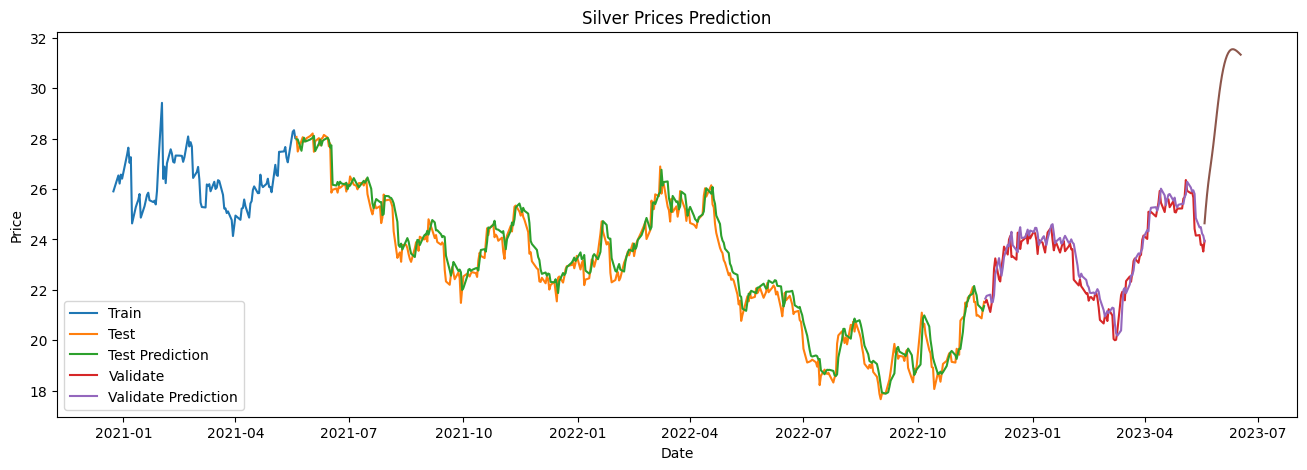

In [30]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [31]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.3727359909613927
MAPE:  1.6701848552591585
RMSE:  0.48312502767989357

** Validate **
MAE:  0.3605638465881347
MAPE:  1.5660722391103443
RMSE:  0.4711958660900838


# Split dataset (5-3-2)

---



In [32]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [33]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [34]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [35]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.15363, saving model to save_model_5_3_2.hdf5
11/11 - 8s - loss: 0.1536 - 8s/epoch - 768ms/step
Epoch 2/80

Epoch 2: loss improved from 0.15363 to 0.07228, saving model to save_model_5_3_2.hdf5
11/11 - 2s - loss: 0.0723 - 2s/epoch - 165ms/step
Epoch 3/80

Epoch 3: loss improved from 0.07228 to 0.04795, saving model to save_model_5_3_2.hdf5
11/11 - 2s - loss: 0.0479 - 2s/epoch - 157ms/step
Epoch 4/80

Epoch 4: loss improved from 0.04795 to 0.04151, saving model to save_model_5_3_2.hdf5
11/11 - 3s - loss: 0.0415 - 3s/epoch - 235ms/step
Epoch 5/80

Epoch 5: loss improved from 0.04151 to 0.03879, saving model to save_model_5_3_2.hdf5
11/11 - 3s - loss: 0.0388 - 3s/epoch - 243ms/step
Epoch 6/80

Epoch 6: loss improved from 0.03879 to 0.03646, saving model to save_model_5_3_2.hdf5
11/11 - 2s - loss: 0.0365 - 2s/epoch - 162ms/step
Epoch 7/80

Epoch 7: loss improved from 0.03646 to 0.03526, saving model to save_model_5_3_2.hdf5
11/11 - 2s - loss:

In [36]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

17/17 [==============================] - 3s 65ms/step


In [37]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

12/12 [==============================] - 0s 40ms/step


In [38]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

8/8 [==============================] - 0s 42ms/step


In [39]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.7063357134761418, 0.690921455287317, 0.6603196191771504, 0.6919415164909893, 0.6856511390683439, 0.673977105292984, 0.6635498129887792, 0.6880879519437831, 0.7087725263515811, 0.7164796554459932, 0.7187464581208204, 0.6917148362235067, 0.6685367788733988, 0.6811175337186898, 0.6850277683327665, 0.6635498129887792, 0.673977105292984, 0.6842343873965769, 0.6893913634818088, 0.6665533265329252, 0.6778306698401902, 0.68366768672787, 0.6708035815482262, 0.67114360194945, 0.6025728210359288, 0.5930522498016545, 0.589652045789414, 0.603422872038989, 0.5877252635158109, 0.5838716989686047, 0.5712342740564432, 0.5724243454607275, 0.5553666553326532, 0.563187124560807, 0.5634704748951603, 0.5568400770712908, 0.5687407911141334, 0.5733877365975292, 0.5613170123540744, 0.5402924175450526, 0.5121840643771959, 0.5042502550153009, 0.5207412444746683, 0.5206279043409271, 0.5096905814348859, 0.5364388529978464, 0.522044656012694, 0.4693414938229624, 0.4665646605462993, 0.4676980618837129, 0

In [40]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.6809547543525696], [0.6771447658538818], [0.6682285666465759], [0.6577448844909668], [0.6477451920509338], [0.6394520998001099], [0.6331380009651184], [0.6283804774284363], [0.6244699358940125], [0.6207542419433594], [0.6168292164802551], [0.6125742197036743], [0.6080816984176636], [0.6035442352294922], [0.5991495847702026], [0.5950184464454651], [0.5911862254142761], [0.5876211524009705], [0.5842565298080444], [0.5810234546661377], [0.577871561050415], [0.5747765302658081], [0.5717363953590393], [0.5687634944915771], [0.5658735036849976], [0.5630791783332825], [0.5603861212730408], [0.5577933192253113], [0.5552952885627747], [0.5528844594955444]]


In [41]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[23.7881276 ]
 [23.72089654]
 [23.56356129]
 [23.37856623]
 [23.20211166]
 [23.05577175]
 [22.94435317]
 [22.8604019 ]
 [22.79139649]
 [22.72582935]
 [22.65656835]
 [22.58148468]
 [22.50220965]
 [22.42214157]
 [22.34459357]
 [22.27169551]
 [22.20407213]
 [22.14116286]
 [22.08179072]
 [22.02473988]
 [21.96912157]
 [21.91450665]
 [21.86086043]
 [21.80840062]
 [21.75740385]
 [21.70809518]
 [21.6605735 ]
 [21.61482091]
 [21.57074066]
 [21.52819917]]


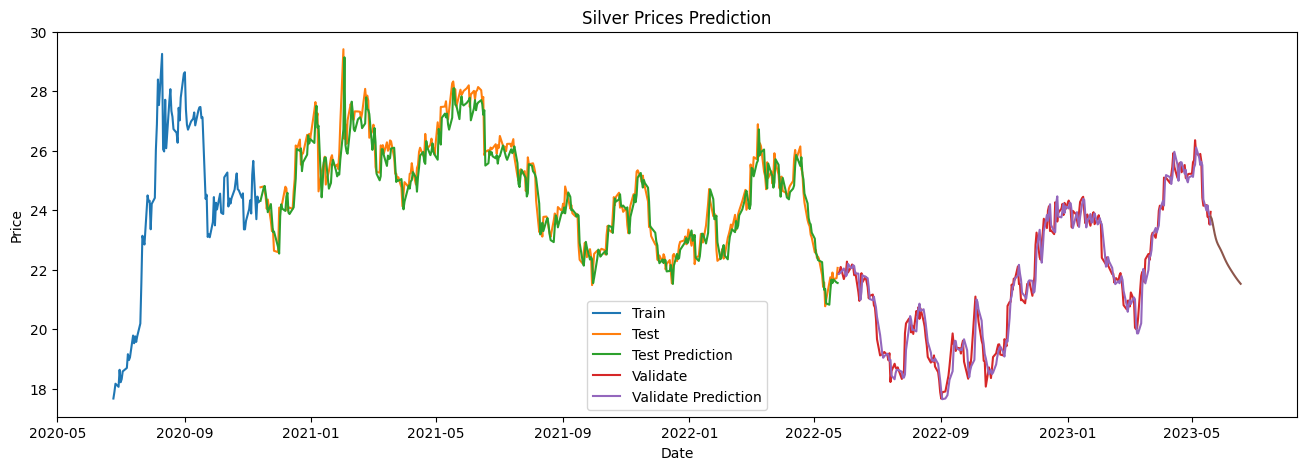

In [42]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [43]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.3873543376127879
MAPE:  1.550070069843004
RMSE:  0.5234332725339352

** Validate **
MAE:  0.3340732112526893
MAPE:  1.5608384407731923
RMSE:  0.4360216287774347


# Evaluate Model

---